<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Topic 2: NumPy and Efficient Numerical Programming </h2> 
</center>

Victor Torres Varas 201173076-3

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [140]:
# first we load the data:
data = np.load("orion.npy")

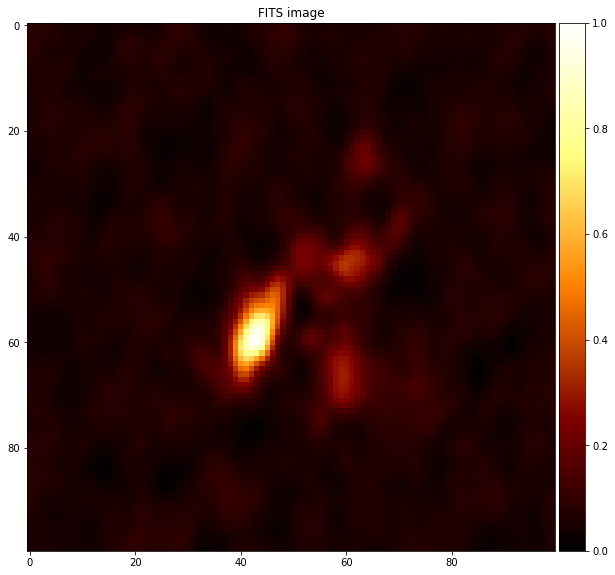

In [141]:
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

In [142]:
data.shape
data.shape[1]*data.shape[0]
rms = (((data.shape[1]*data.shape[0])**(-1))*((np.dot(data,data))))**(1/2)
print(rms)


[[ 0.00593639  0.00589966  0.00593433 ...,  0.00563996  0.005748
   0.00583689]
 [ 0.00600966  0.00597365  0.00601297 ...,  0.00571569  0.00581863
   0.0059047 ]
 [ 0.00605522  0.00601806  0.0060601  ...,  0.00576332  0.00585831
   0.00593922]
 ..., 
 [ 0.00557292  0.00553507  0.00558144 ...,  0.00528703  0.00535195
   0.00542962]
 [ 0.00553077  0.00550052  0.00555218 ...,  0.0052475   0.00530763
   0.00538283]
 [ 0.00550453  0.00548087  0.00553683 ...,  0.0052192   0.00528083
   0.0053572 ]]


### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

In [143]:
data2 = data 
mask = data > rms
#for x in np.nditer(rms):
#      print(x)
for j in range(100):
    for i in range(100):
        if data[j][i] < 0 :
            data2[j][i] = 0
print(data2)
print("------------")
print(mask)

[[ 0.07934934  0.07887424  0.07949005 ...,  0.05861184  0.06408084
   0.06972546]
 [ 0.08401045  0.07949627  0.07668243 ...,  0.05754891  0.06426823
   0.07336064]
 [ 0.08848979  0.08050441  0.07396713 ...,  0.05296687  0.06223659
   0.07437145]
 ..., 
 [ 0.05004189  0.05210273  0.05307278 ...,  0.03456876  0.05134565
   0.06736349]
 [ 0.05153948  0.05053768  0.05080934 ...,  0.03709191  0.05011114
   0.06252449]
 [ 0.05588185  0.04947473  0.04778447 ...,  0.04304464  0.05080567
   0.05742823]]
------------
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_ (sin generar copias de el mismo).

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [144]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])

def apply_filter(data, mask, kernel_filter):
    suma = 0
    #Recorremos data, por sus filas y columnas
    #guardaremos en suma 
    for a in range(100):
        if a==98:
            break;
        for b in range(100):    
            if b==98:
                break;
        #No consideramos las filas y columnas finales ni
        #iniciales, dado que no hay como formar el cuadrado
            for columna in range(a,a+3):
                suma = 0
                for fila in range(b,b+3):
                    if mask[a+1][b+1] == False:
                        break;
        #Debemos considerar una matriz de 3x3 para calcular la 
        #suma del valor del centro y reemplazarlo, se nota un pequeño marco
                    suma += data[columna][fila] * kernel_filter[columna%3][fila%3]
                    if columna == a+2 and fila == b+2:
                            data[a+1][b+1] = suma
    image_plot(data)
    return None

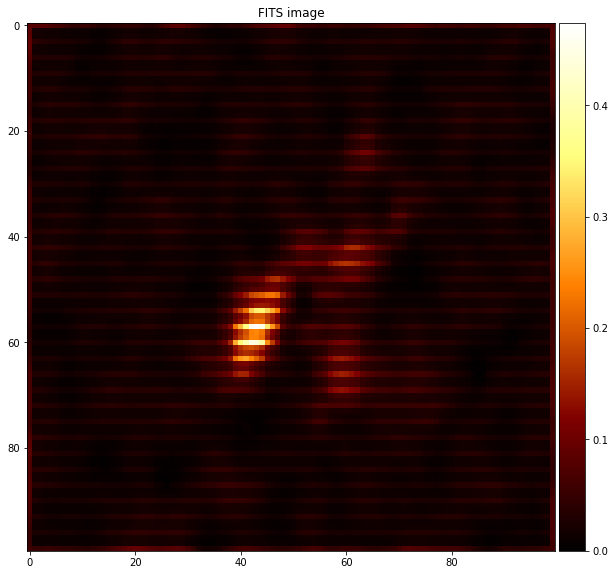

In [145]:
apply_filter(data,mask,kernel_filter)